# Singular value decomposition

## SVD and its applications

SVD, Singular value decomposition, of matrix $A$ of size $m\times n$ is a factorisation 

$$A = U\Sigma V^T,$$

where $U$ is an orthogonal matrix of size $m\times m$, $V$ is an orthogonal matrix of size $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ is a diagonal matrix of size $m\times n$, where $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

It's not necessary for matrices $U$ and $V$ to be square. *Compact SVD* is a following decomposition

$$A = U\Sigma V^T,$$

where $U$ is an orthogonal matrix of size $m\times k$, $V^T$ is an orthogonal matrix of size $k\times n$, $\Sigma$ is a diagonal matrix of size $k\times k$, where $k = \min(m,n)$. In these tasks we'll be working only with a compact decomposition.

### Compressing data using SVD = finding low-rank approximation

Define *Frobenius norm* of a matrix as

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

How to find matrix $A_{r}$ of rank $r$ that is closest to $A$ in terms of Frobenius norm (for which the norm of the difference $||A - A_{r}||_{frob}$ is minimum). It can be done using SVD.

**Theorem.** Let $\Sigma_{r}$ be a matrix created out of $\Sigma$ by changing diagonal elements $\sigma_{i}$ ($i > r$) to zeros, then $A_{r} = U\Sigma_{r}V^T$.

It can be written differently. If

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

then

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

In this case

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

If singular values of a matrix decline fast (and in real life it usually happens just like that), then the norm of the difference will be small at a comparably small value of $r$.

Keeping the original matrix takes $m\times n$ of memory. Now if we separately store $U_r$, $V_r$ and diagonal elements of $\Sigma_r$, it'll take $mr + nr + r = r(m + n + 1)$.

**Decomposition into components of rank 1**

Denote $u_1,\ldots, u_k$ as columns of matrix $U$ and $v_1, \ldots, v_k$ as columns of $V$. Then the following equality is true

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Matrix $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ will be called the $k$th component of rank 1 of matrix $A$. Terms of this sum are orthogonal with dot product $(X, Y) = \mathrm{tr}(X^TY)$.

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

### Task 1. Data compression using SVD

In [2]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2)

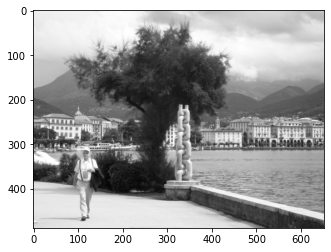

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Find singular value decomposition of this matrix.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

Draw a graph of diagonal elements of the matrix $\Sigma$:

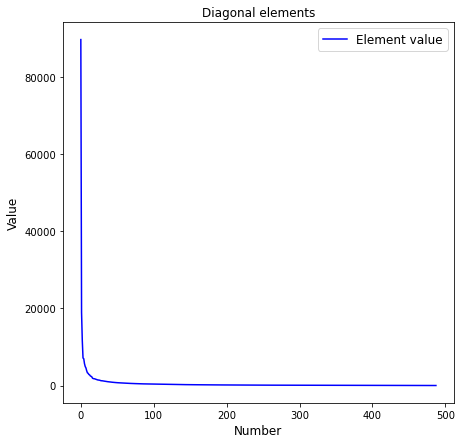

In [21]:
plt.figure(figsize=(7, 7))
plt.plot(S, color='blue', label='Element value')
plt.title('Diagonal elements', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xlabel('Number', fontsize=12)
plt.legend(fontsize=12)
plt.show()

They decline fast enough and the sum of the first ones might give a picture close to the original.

Visualize the first component of rank 1.

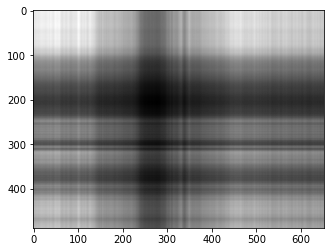

In [13]:
small_img = np.matrix(U[:, :1]) * np.diag(S[:1]) * np.matrix(VT[:1, :])
plt.imshow(small_img, cmap='gray');

Visualise the sum of components of rank 1 from the first to the twentieth, from the first to the fiftieth, from the twentieth to the hundredths, from the twentieth to the hundredth.

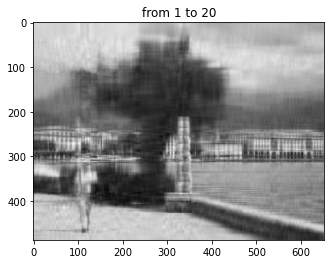

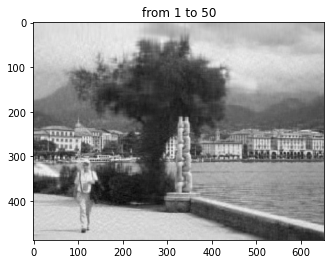

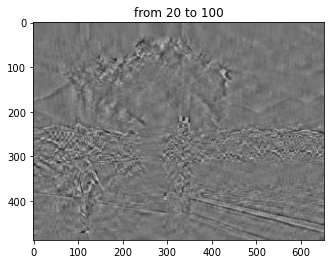

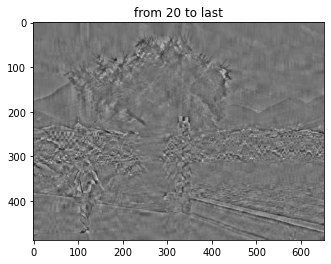

In [36]:
small_img = np.matrix(U[:, :20]) * np.diag(S[:20]) * np.matrix(VT[:20, :])
plt.imshow(small_img, cmap='gray');
title = "from 1 to 20"
plt.title(title)
plt.show()

small_img = np.matrix(U[:, :50]) * np.diag(S[:50]) * np.matrix(VT[:50, :])
plt.imshow(small_img, cmap='gray');
title = "from 1 to 50"
plt.title(title)
plt.show()

small_img = np.matrix(U[:, 19:100]) * np.diag(S[19:100]) * np.matrix(VT[19:100, :])
plt.imshow(small_img, cmap='gray');
title = "from 20 to 100"
plt.title(title)
plt.show()

small_img = np.matrix(U[:, 19:]) * np.diag(S[19:]) * np.matrix(VT[19:, :])
plt.imshow(small_img, cmap='gray');
title = "from 20 to last"
plt.title(title)
plt.show()

Visualise the sum of components that will give an image close to the original.

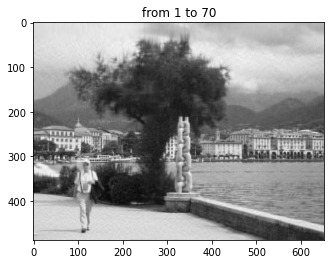

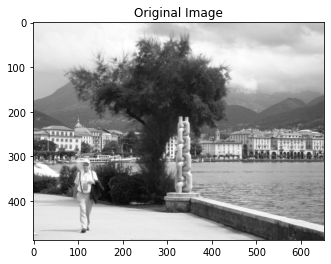

In [39]:
small_img = np.matrix(U[:, :70]) * np.diag(S[:70]) * np.matrix(VT[:70, :])
plt.imshow(small_img, cmap='gray')
title = "from 1 to 70"
plt.title(title)
plt.show()


imgplot = plt.imshow(img, cmap='gray')
title = "Original Image"
plt.title(title)
plt.show()

Find how many times less space is needed to store the new image compared to the original.

In [44]:
img_s = img.nbytes
u_s = U[:, :70].nbytes
d_s = S[:70].nbytes
vt_s = VT[:70, :].nbytes
print("Image:", img_s)
print("U:", u_s)
print("S:", d_s)
print("VT:", vt_s)
print("Components take up", img_s / (u_s + d_s + vt_s), "times less space")

Image: 2549312
U: 273280
S: 560
VT: 365680
Components take up 3.986289717287966 times less space


### Task 2. Geometry of SVD. Visiualising data using SVD

**Geometrical meaning of SVD**

Suppose we have data on points $x_1,\ldots,x_m\in\mathbb{R}^n$. Write it into an object-parameter matrix:

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(rows are objects, columns are parameters) and do SVD: $X = U\Sigma V^T$. It can be interpreted as

$$X = U\Sigma\cdot V^T,$$

where $U\Sigma$ is an object-parameter matrix for the same objects but with different parameters that were derived from the original ones by a linear map $V$.

Consider $X^TX = V\Sigma^2V^T$. It is a Gram matrix of a system of columns of matrix $X$, its coefficients are dot products of vectors of parameters. $\sigma_1^2$, square of the first singular value, is the biggest eigenvalue of matrix $X^TX$, and $v_1$, the first column of $V$ is the first eigenvector.

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Rows of matrix $X$ are coordinates of objects $x_1,\ldots,x_m$ in the space of parameters. Product $Xw$ is a vector of values of some new parameter on the same objects. This new parameter is a combination of existing ones with coefficients $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

$|Xw|^2$ is a square of the length of vector of values of new parameters.

Therefore, the first singular value $\sigma_1$ corresponds to a parameter that has the largest sum of squares of values, a parameter with largest values.

Singular decomposition does the following:
- finds a new parameter (new direction) along which "variance"$^1$ is maximum;
- finds a parameter in its orthogonal plane, along which the "variance" is maximum;
- and so on.

**Visualising data using SVD**

First of the new parameters have the most variable values. Often (but not always) they contain the most important characteristics of a dateset. And using the first few one can draw a dataset, take a look at it and maybe find some kind of structure.

Using a function `dsklearn.datasets.load_digits()` load a dataset of handwritten numbers [MNIST](http://yann.lecun.com/exdb/mnist/). It contains several attributes, you'll need `digits.data` (`np.array`, rows of which are values of pixels written into one row) and `digits.target` with corresponding numbers.

0


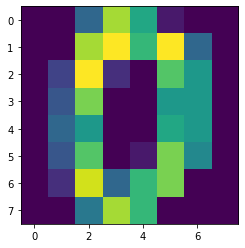

In [45]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

SVD of matrix `digits.data`

In [234]:
U, S, VT = svd(digits.data, full_matrices=False)

Visualise the data by projecting it onto such a plane that coordinates of the points correspond to the first two parameters. Use different colors for different numbers.

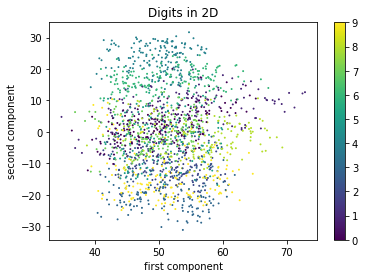

In [237]:
comps = digits.data @ VT.T
im = plt.scatter(comps[:,0], comps[:,1], s=.9, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 2D")
plt.colorbar(im)
plt.show()

Subtract the mean from each parameter, do SVD and draw the points.

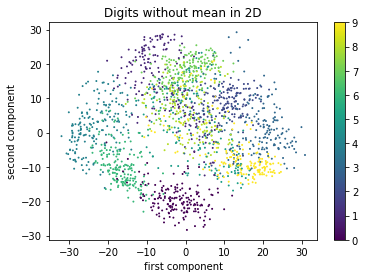

In [238]:
U, S, VT = svd(digits.data - np.mean(digits.data, axis=0), full_matrices=False)
comps = digits.data @ VT.T
plt.scatter(comps[:,0], comps[:,1], s=.9, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits without mean in 2D")
plt.colorbar(im)
plt.show()

Compare SVD to another method of lowering the number of dimensions: [random Gaussian projections](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

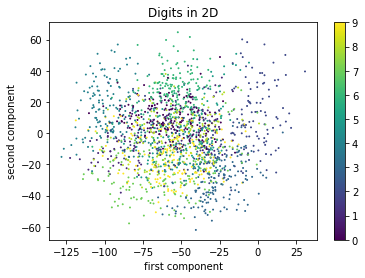

In [239]:
from sklearn.random_projection import GaussianRandomProjection
grp = GaussianRandomProjection(n_components = 2, random_state=42)
comps = grp.fit_transform(digits.data)
plt.scatter(comps[:,0], comps[:,1], s=.9, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 2D")
plt.colorbar(im)
plt.show()

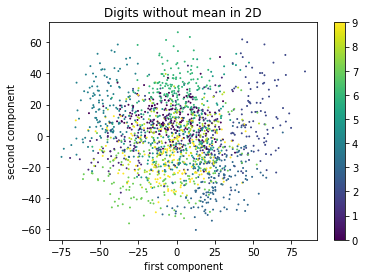

In [240]:
comps = grp.fit_transform(digits.data - np.mean(digits.data, axis=0))
plt.scatter(comps[:,0], comps[:,1], s=.9, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits without mean in 2D")
plt.colorbar(im)
plt.show()

Subtracting the mean doesn't affect Gaussian projections.

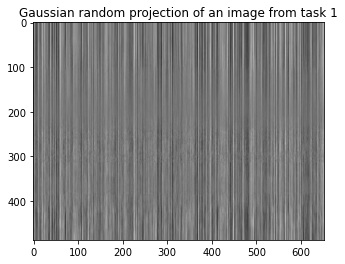

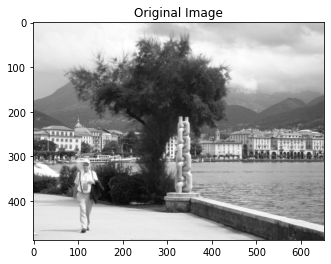

In [246]:
grp = GaussianRandomProjection(n_components = len(img[0]), random_state=42)
small_img = grp.fit_transform(img)
plt.imshow(small_img, cmap='gray');
title = "Gaussian random projection of an image from task 1"
plt.title(title)
plt.show()

imgplot = plt.imshow(img, cmap='gray')
title = "Original Image"
plt.title(title)
plt.show()

We shouldn't have done that.

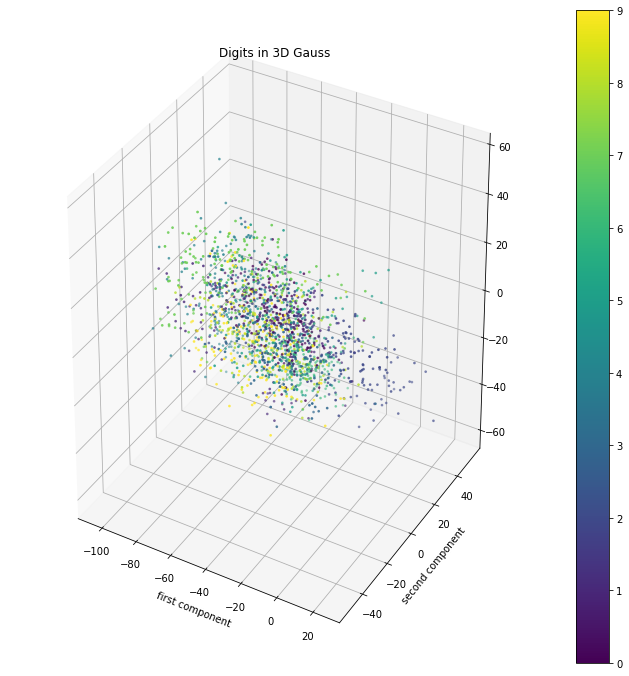

In [264]:
fig = plt.figure(figsize=(12, 12))
grp = GaussianRandomProjection(n_components = 3, random_state=42)
comps = grp.fit_transform(digits.data)
ax = fig.add_subplot(projection='3d')
im = ax.scatter(comps[:,0], comps[:,1], comps[:,2], s=3, c = digits.target, cmap='viridis')
plt.colorbar(im)
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 3D Gauss")
plt.show()

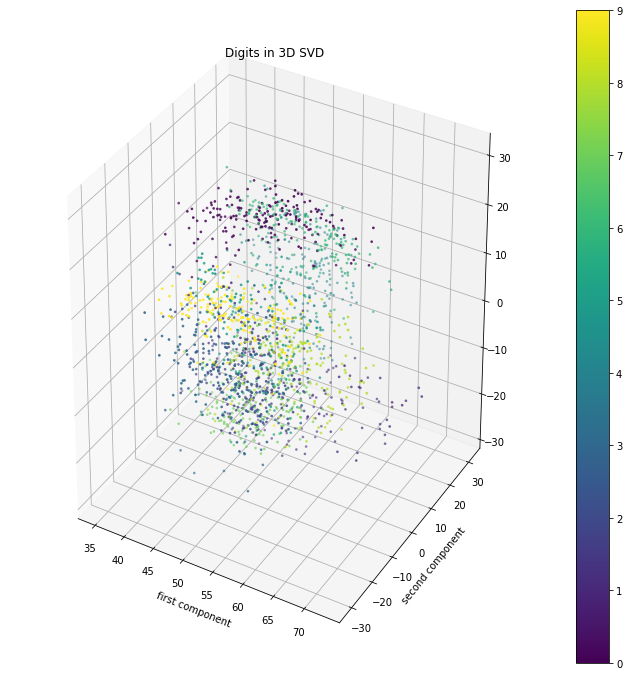

In [262]:
fig = plt.figure(figsize=(12, 12))
U, S, VT = svd(digits.data, full_matrices=False)
comps = digits.data @ VT.T
ax = fig.add_subplot(projection='3d')
im = ax.scatter(comps[:,0], comps[:,1], comps[:,2], s=3, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 3D SVD")
plt.colorbar(im)
plt.show()

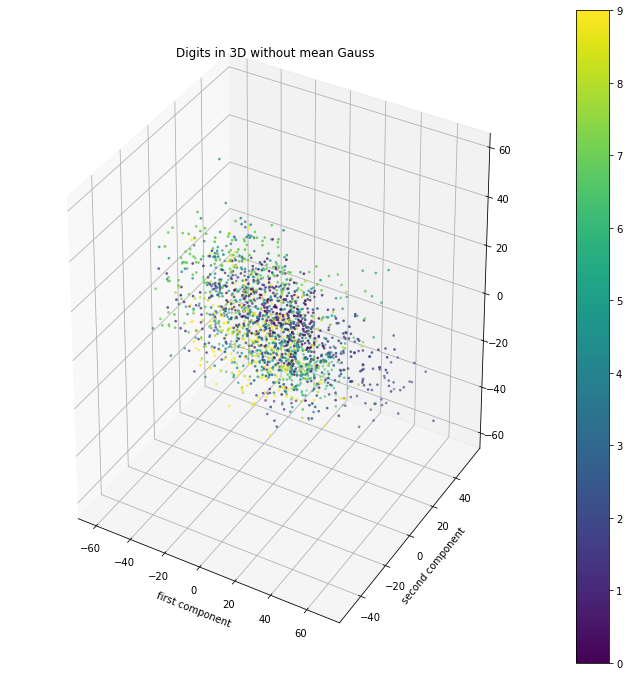

In [261]:
fig = plt.figure(figsize=(12, 12))
grp = GaussianRandomProjection(n_components = 3, random_state=42)
comps = grp.fit_transform(digits.data - np.mean(digits.data, axis=0))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(comps[:,0], comps[:,1], comps[:,2], s=3, c = digits.target, cmap='viridis')
plt.colorbar(im)
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 3D without mean Gauss")
plt.show()

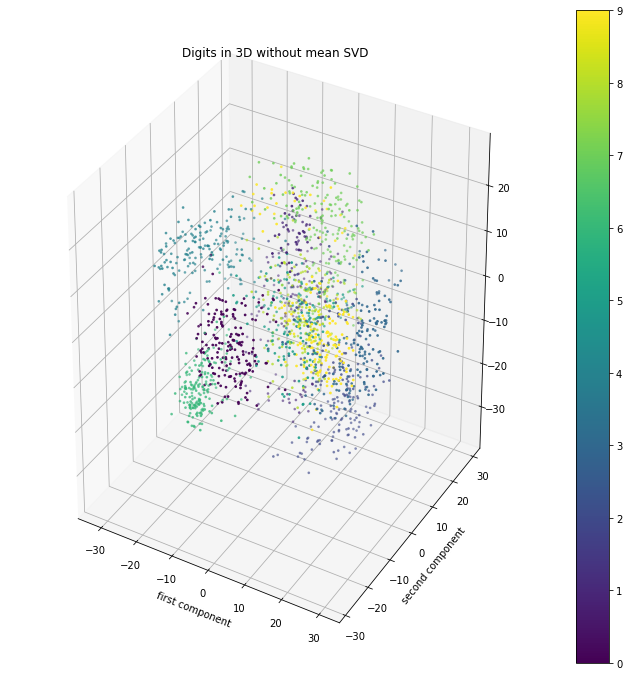

In [263]:
fig = plt.figure(figsize=(12, 12))
U, S, VT = svd(digits.data - np.mean(digits.data, axis=0), full_matrices=False)
comps = digits.data @ VT.T
ax = fig.add_subplot(projection='3d')
im = ax.scatter(comps[:,0], comps[:,1], comps[:,2], s=3, c = digits.target, cmap='viridis')
plt.xlabel("first component")
plt.ylabel("second component")
plt.title("Digits in 3D without mean SVD")
plt.colorbar(im)
plt.show()